<center>
    <h1 style="color:green">
        <b>
            <u> HOUSES PRICE PROJECT </u>
        </b>
    </h1>
</center>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
#import statsmodels.api as smf

from src.data_processing.load_data import load_data
from src.data_processing.formatting_data import formatting
from config.config import TEST_RATIO, SEED 

In [20]:
print(TEST_RATIO, SEED)

0.3 13


# Introduction

# EDA

In [21]:
df = load_data('data/house_prices.csv')

df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


In [22]:
# Corrections on columns names and modalities names
formatting(df)
df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnishing_Status,House_Age
0,4543000.0,4990.0,4.0,2.0,2.0,True,True,True,False,False,0.0,True,Furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,True,False,False,False,True,2.0,False,Furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,True,False,True,True,False,2.0,False,Furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,True,False,False,False,False,0.0,False,Unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,True,False,True,False,True,3.0,True,Furnished,NaN


drop duplicates sur les lignes

In [23]:
df.shape

(809, 14)

In [24]:
df.drop_duplicates(inplace = True)
df.shape

(809, 14)

## Univariate Analysis

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


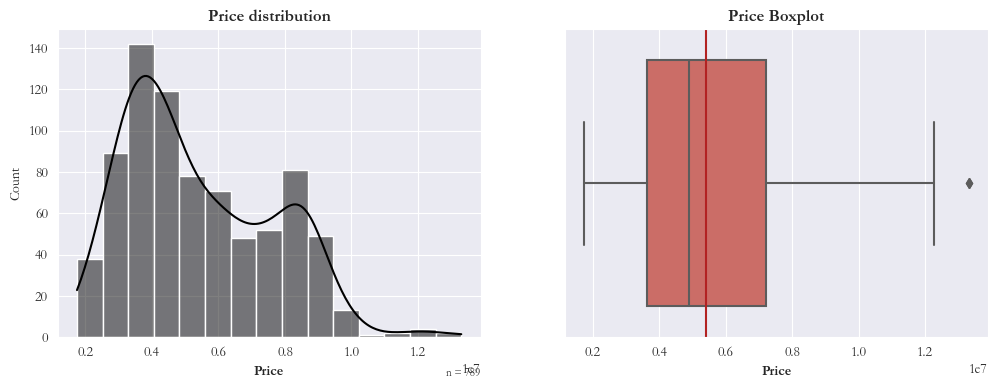

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


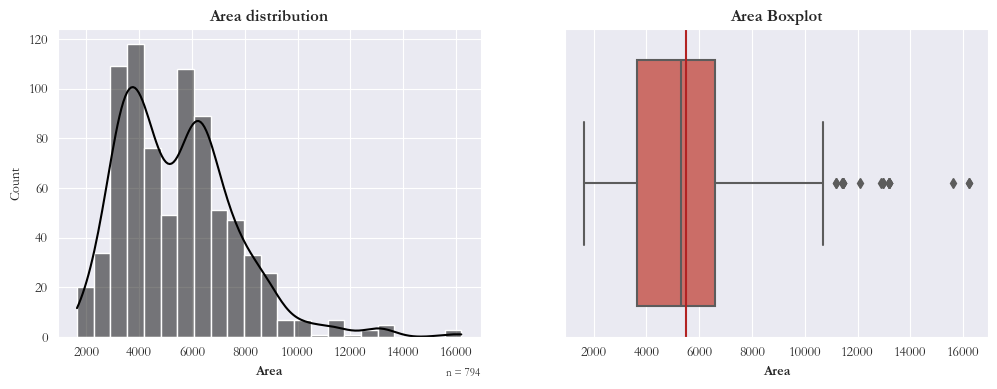

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


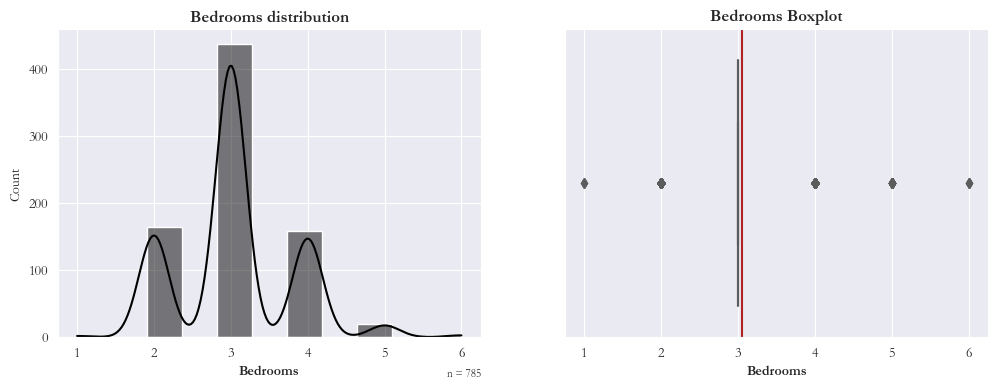

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


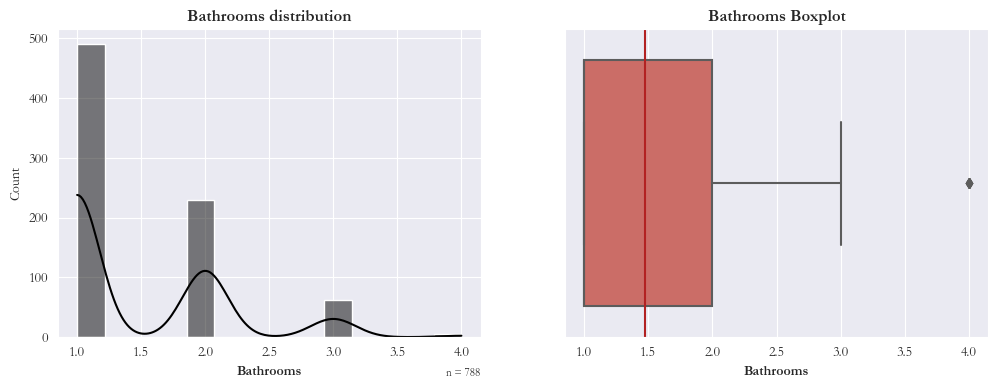

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


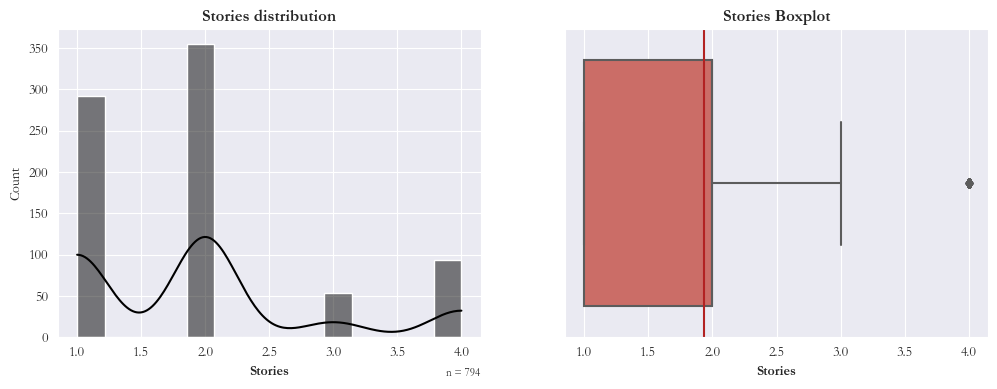

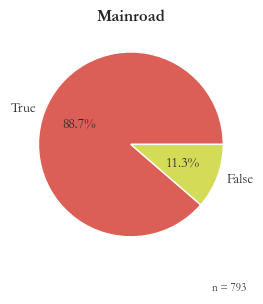

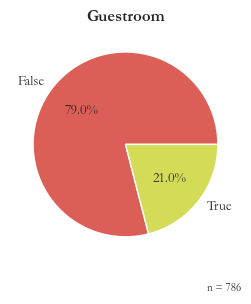

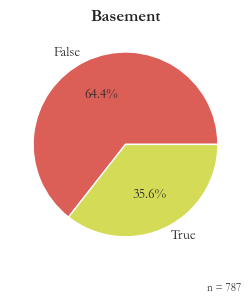

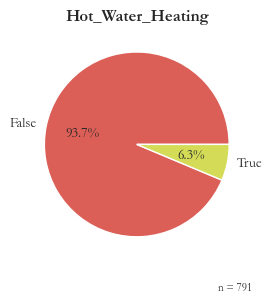

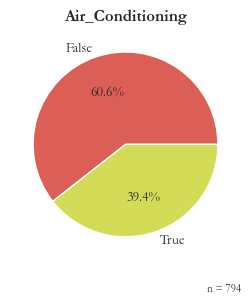

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


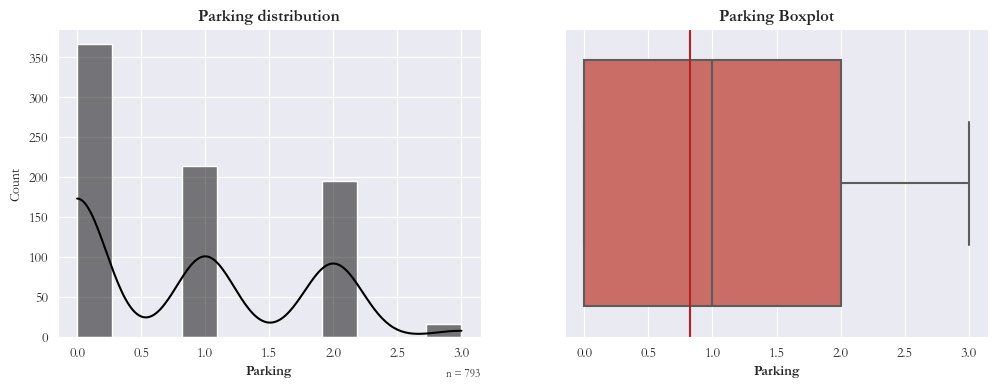

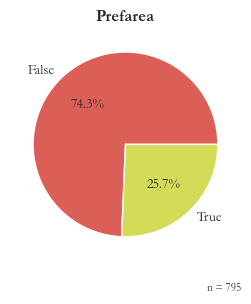

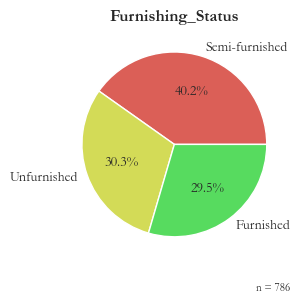

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


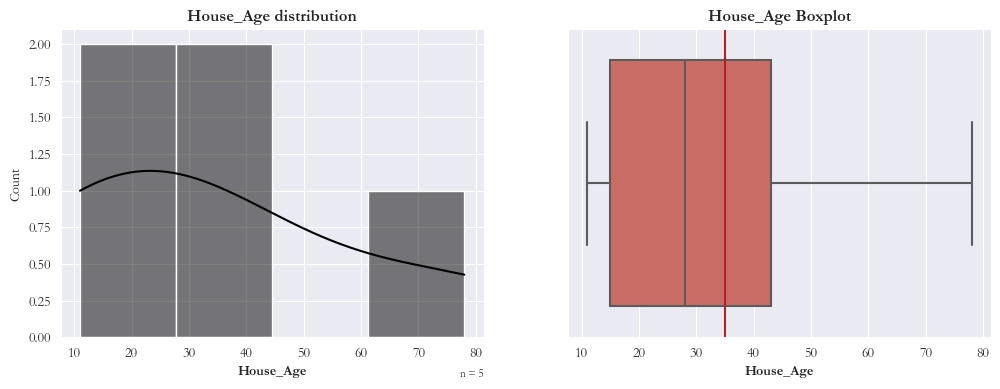

In [25]:
from src.figures.dataviz import dataviz_univariate
dataviz_univariate(df)

## Bivariate Analysis

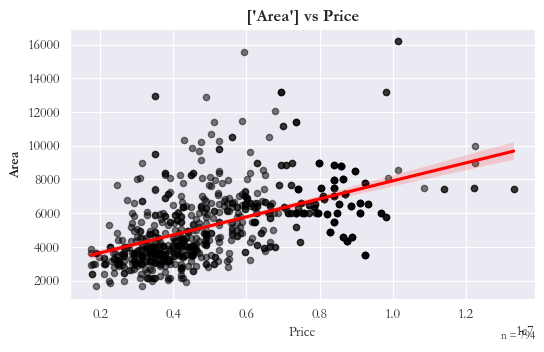

Pearson's correlation: 0.5268126754120181
P-value: 5.737673441674552e-59 



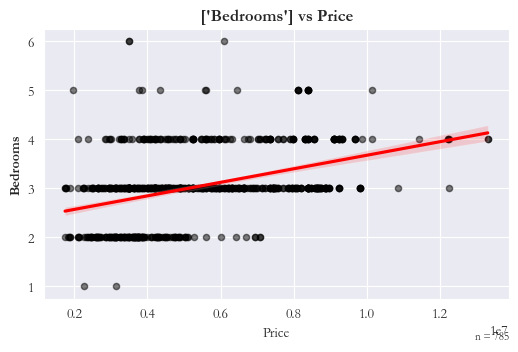

Pearson's correlation: 0.3949177560372363
P-value: 1.369237599492918e-31 



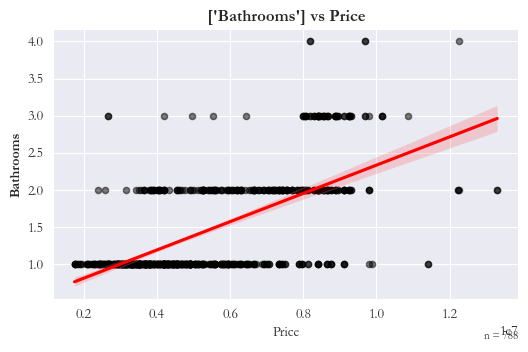

Pearson's correlation: 0.6124582220721573
P-value: 1.8557795978265256e-84 



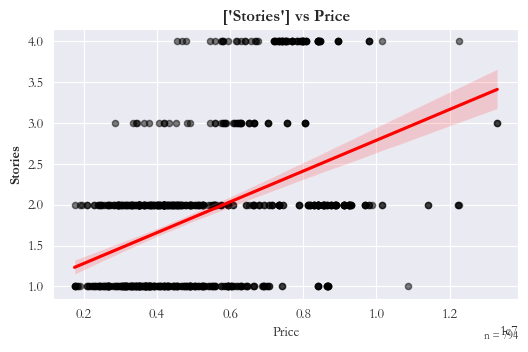

Pearson's correlation: 0.42651821822389685
P-value: 4.26204750471727e-37 



c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


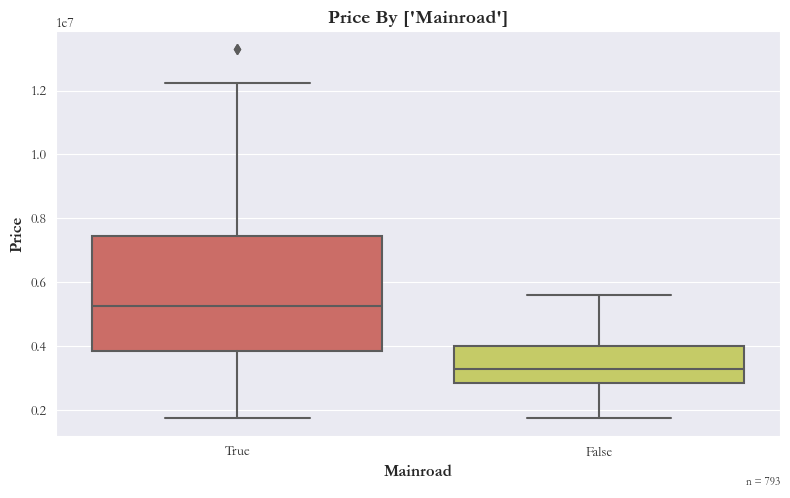

ANOVA Test, Price on ['Mainroad'] (H0: Same mean Price among modalities):
F-value = 92.522719
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


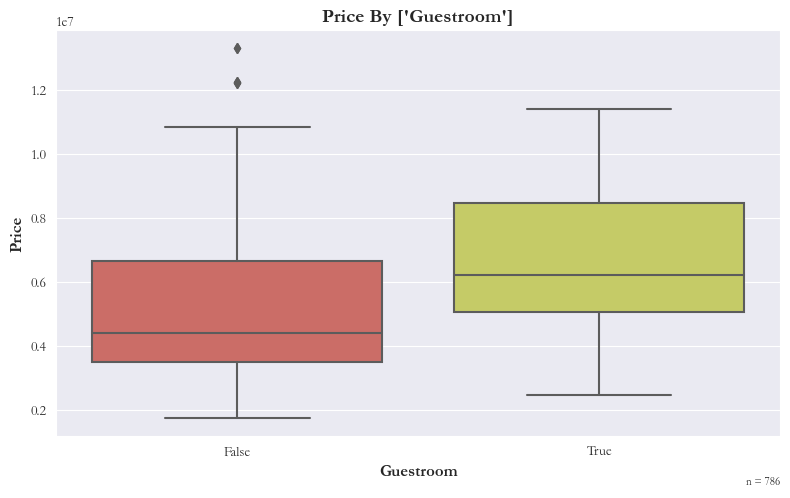

ANOVA Test, Price on ['Guestroom'] (H0: Same mean Price among modalities):
F-value = 62.366230
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


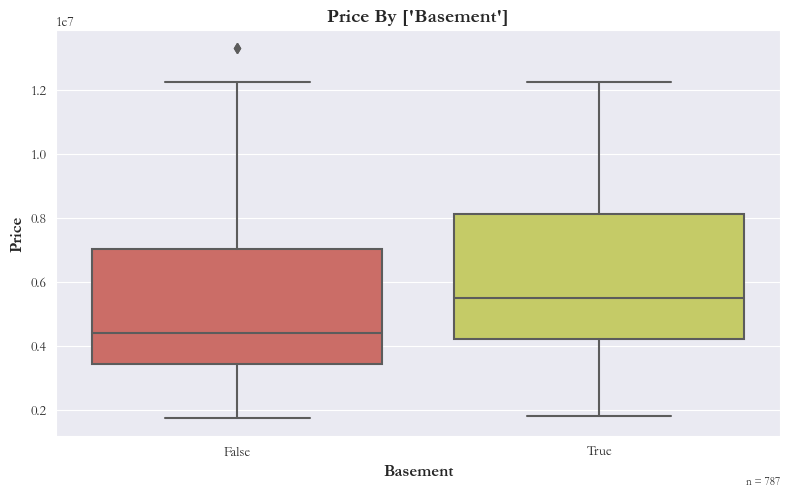

ANOVA Test, Price on ['Basement'] (H0: Same mean Price among modalities):
F-value = 26.391360
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


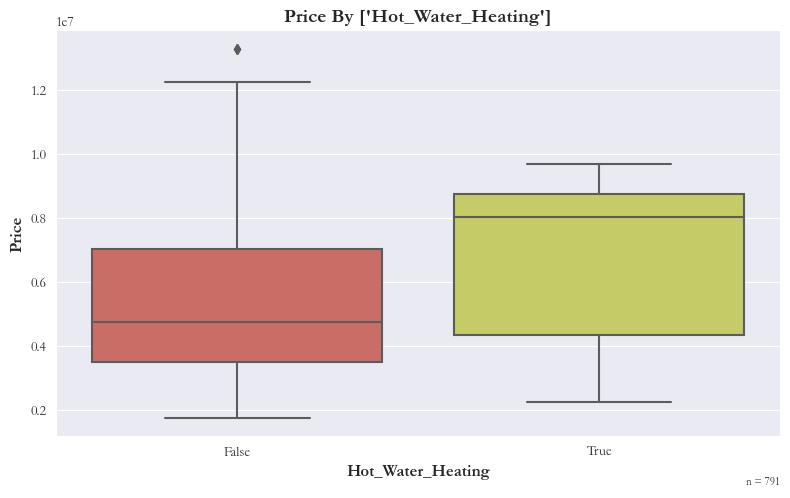

ANOVA Test, Price on ['Hot_Water_Heating'] (H0: Same mean Price among modalities):
F-value = 23.171560
P-value = 0.000002


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


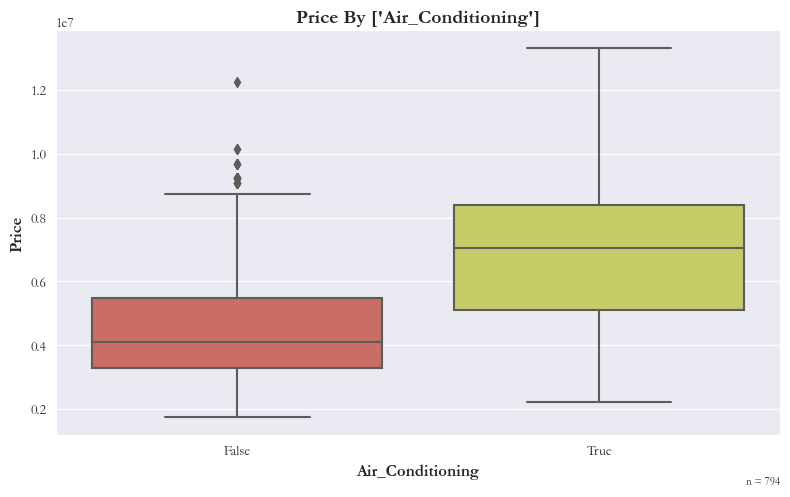

ANOVA Test, Price on ['Air_Conditioning'] (H0: Same mean Price among modalities):
F-value = 238.962393
P-value = 0.000000


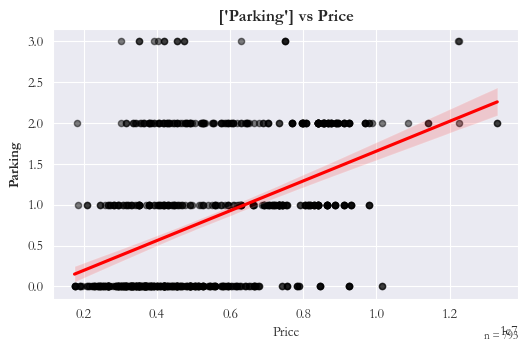

Pearson's correlation: 0.44905058779605705
P-value: 2.1368077039451706e-41 



c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


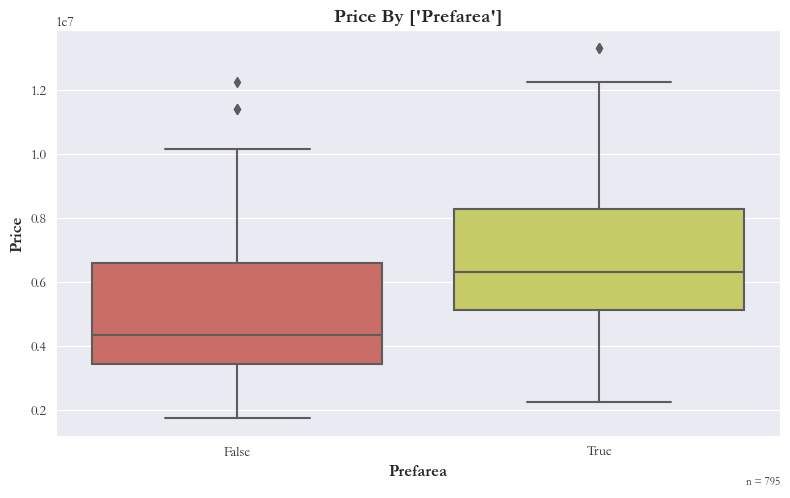

ANOVA Test, Price on ['Prefarea'] (H0: Same mean Price among modalities):
F-value = 80.021988
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


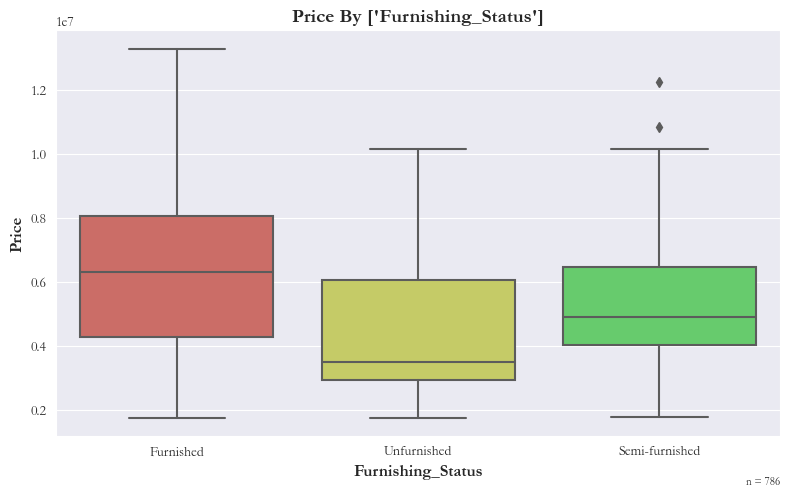

ANOVA Test, Price on ['Furnishing_Status'] (H0: Same mean Price among modalities):
F-value = 35.632226
P-value = 0.000000


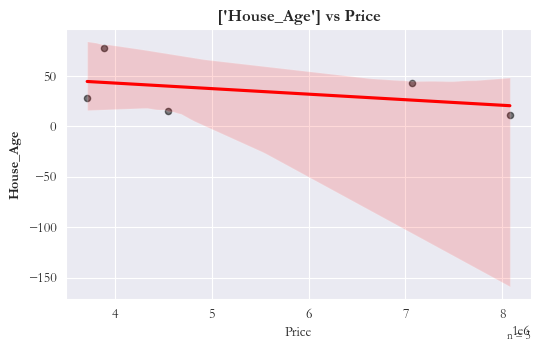

Pearson's correlation: -0.024165506956652257
P-value: 0.49247655837641874 



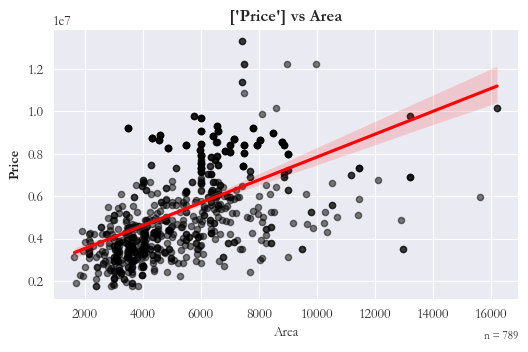

Pearson's correlation: 0.5268126754120181
P-value: 5.737673441674552e-59 



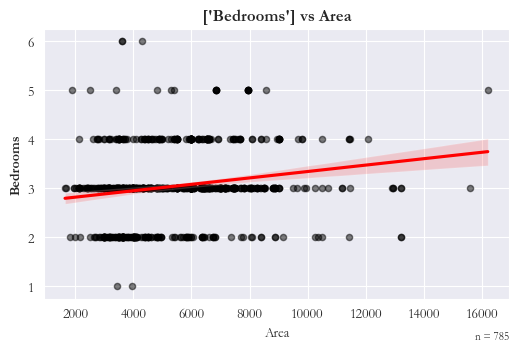

Pearson's correlation: 0.18200168713021753
P-value: 1.8656524007717174e-07 



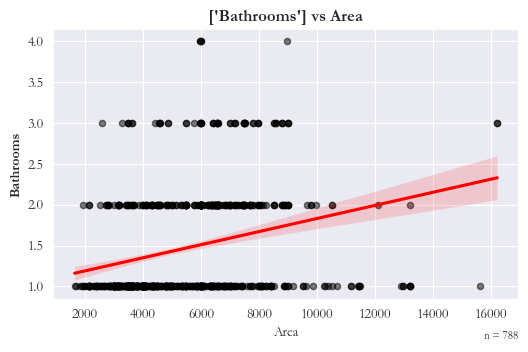

Pearson's correlation: 0.2590787405263441
P-value: 7.114388959327191e-14 



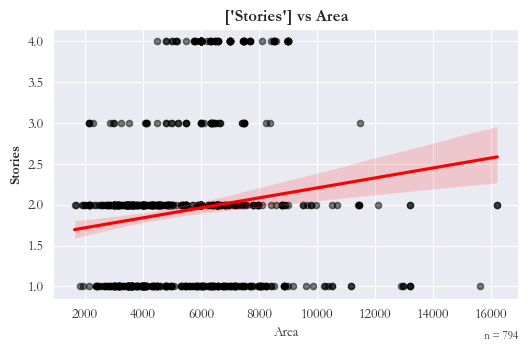

Pearson's correlation: 0.13876971186123163
P-value: 7.492193800460077e-05 



c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


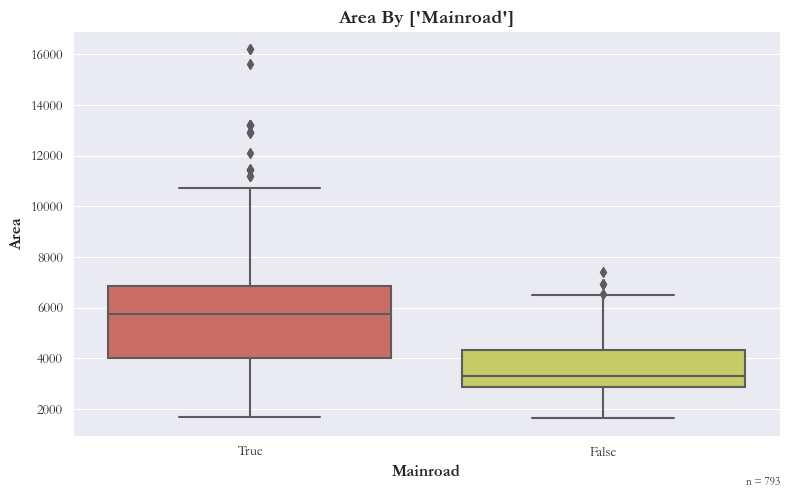

ANOVA Test, Area on ['Mainroad'] (H0: Same mean Area among modalities):
F-value = 78.562264
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


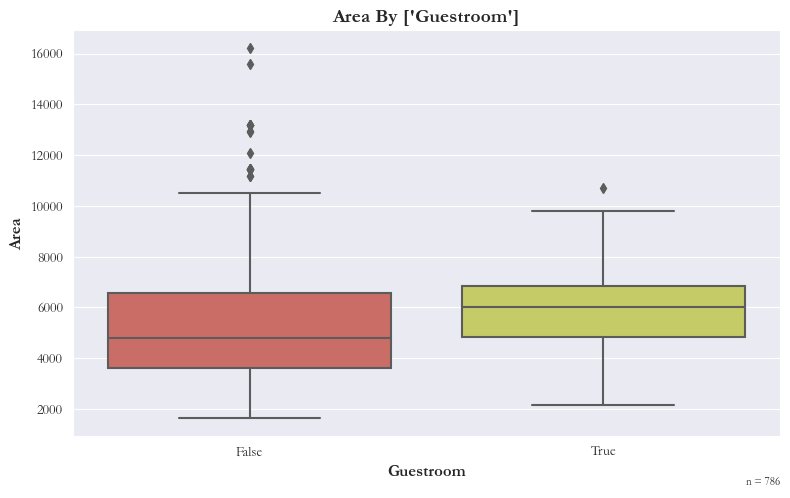

ANOVA Test, Area on ['Guestroom'] (H0: Same mean Area among modalities):
F-value = 13.166014
P-value = 0.000304


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


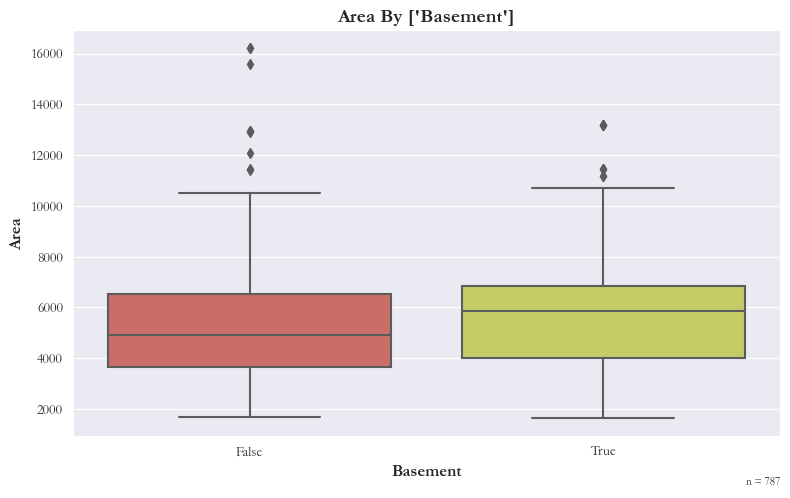

ANOVA Test, Area on ['Basement'] (H0: Same mean Area among modalities):
F-value = 2.322508
P-value = 0.127924


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


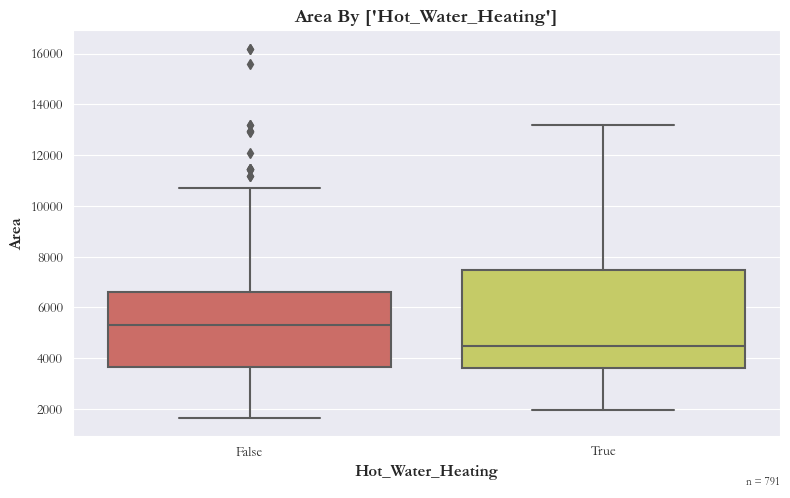

ANOVA Test, Area on ['Hot_Water_Heating'] (H0: Same mean Area among modalities):
F-value = 0.528111
P-value = 0.467621


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


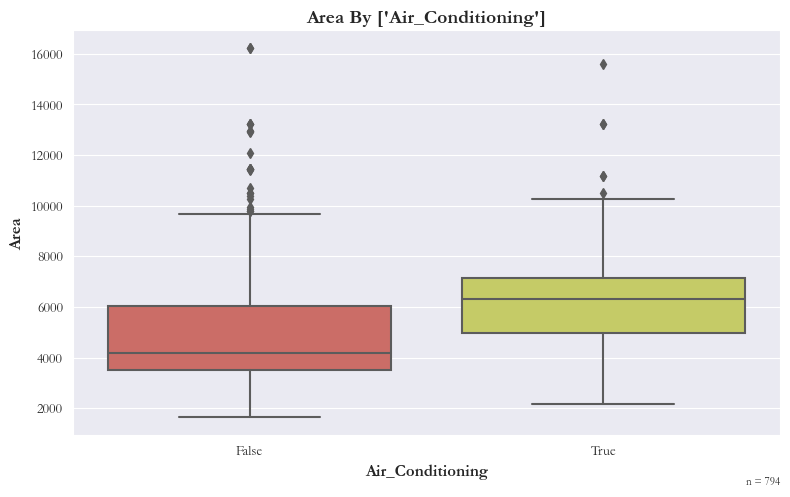

ANOVA Test, Area on ['Air_Conditioning'] (H0: Same mean Area among modalities):
F-value = 53.284031
P-value = 0.000000


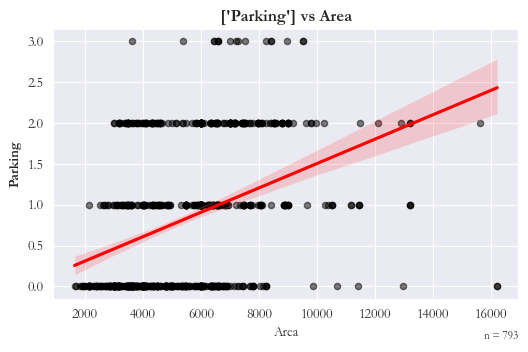

Pearson's correlation: 0.3696223817590977
P-value: 1.3634496809712892e-27 



c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


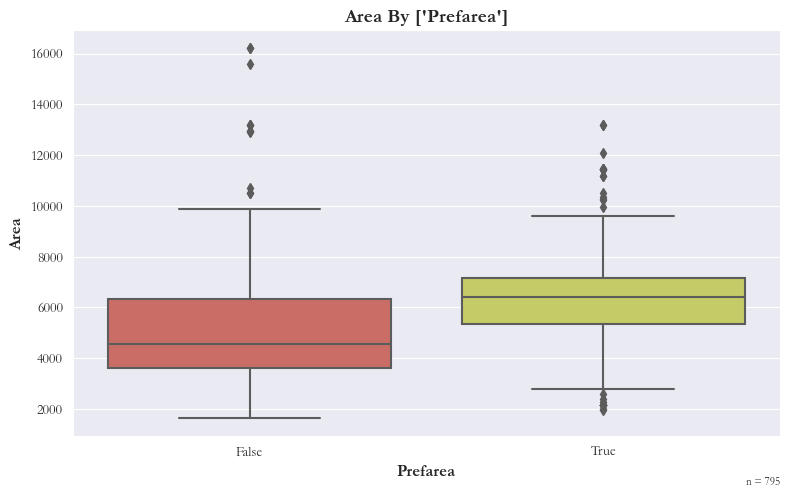

ANOVA Test, Area on ['Prefarea'] (H0: Same mean Area among modalities):
F-value = 37.927467
P-value = 0.000000


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


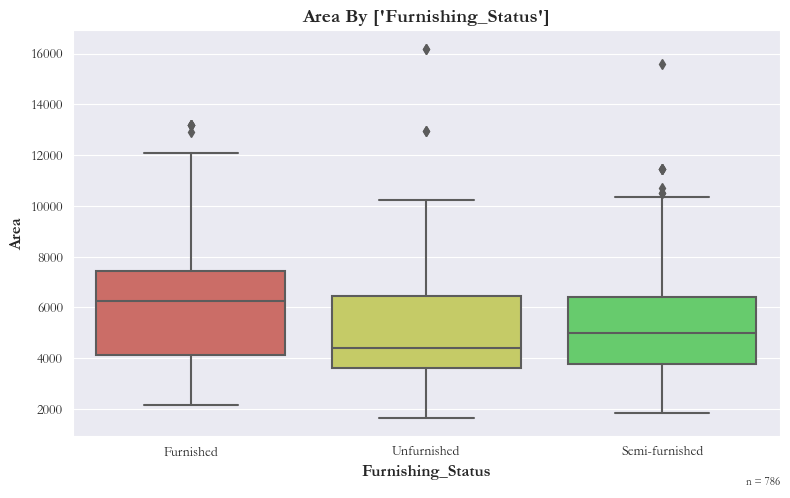

ANOVA Test, Area on ['Furnishing_Status'] (H0: Same mean Area among modalities):
F-value = 12.712023
P-value = 0.000004


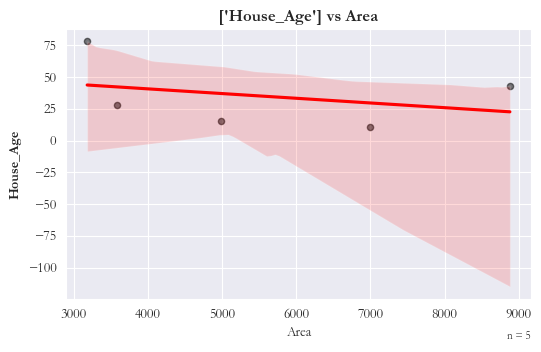

Pearson's correlation: -0.023847016554463807
P-value: 0.49819884260982605 



In [26]:
from src.figures.dataviz import dataviz_bivariate

dataviz_bivariate(df, "Price")
dataviz_bivariate(df, "Area")


c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


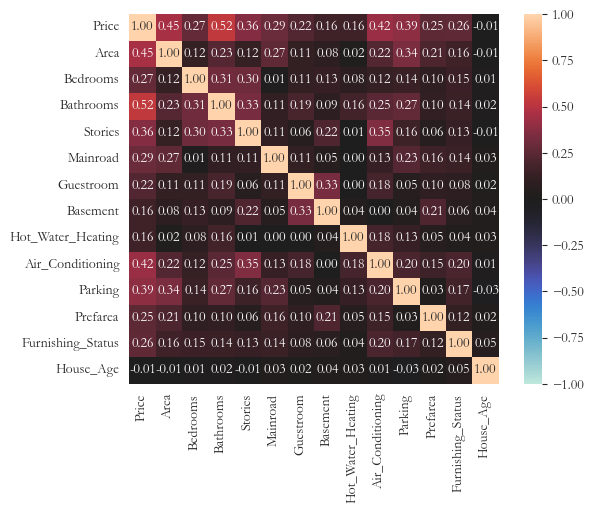

<Axes: >

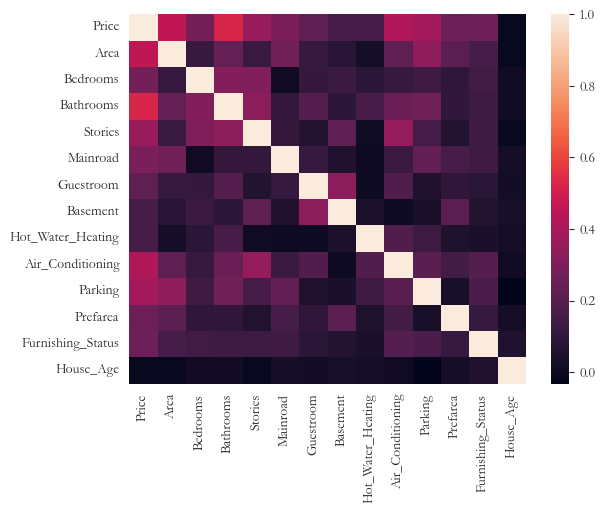

In [27]:
from dython.nominal import associations

sns.heatmap(associations(df)["corr"])

## Missing data

In [28]:
print("% of Na's by column : \n", df.isna().mean() * 100)

% of Na's by column : 
 Price                 2.472188
Area                  1.854141
Bedrooms              2.966625
Bathrooms             2.595797
Stories               1.854141
Mainroad              1.977750
Guestroom             2.843016
Basement              2.719407
Hot_Water_Heating     2.224969
Air_Conditioning      1.854141
Parking               1.977750
Prefarea              1.730532
Furnishing_Status     2.843016
House_Age            99.381953
dtype: float64


- It seems there is not enough information in the column "House_Age". Thus, we will simply remove the column.
- All others variables have some missing values, but a decent amount (< 3%)
- As the project's goal is to implement models to predict "Price", we decided we will not impute the missing values for "Price". It would be odd to predict the missing values and then to train the model with imputed data on the target variable, and moreover the reasonable amount of missing values allows us to do so. Then the lines where Price is NA will simply be removed from the DataFrame

In [29]:
# First filtering
df.drop(labels = ["House_Age"], axis=1, inplace = True, errors="ignore")        # dropping house_Age (Because 99% of Na)
df.dropna(subset=["Price"], inplace = True)     # dropping na's in Price. We won't impute our target variable

df.to_pickle("df.pkl")  # Exports the pre-imputation table in a file. Might be useful
print("# of na's just before imputation : \n", df.isna().sum())

# of na's just before imputation : 
 Price                 0
Area                 13
Bedrooms             21
Bathrooms            19
Stories              15
Mainroad             14
Guestroom            20
Basement             21
Hot_Water_Heating    17
Air_Conditioning     13
Parking              16
Prefarea             13
Furnishing_Status    20
dtype: int64


In [30]:
from src.data_processing.na_imputations import df_na_imputed


imputed_df = df_na_imputed(df, SEED = SEED)   # Impute all missing values. Adapted technique for each variable
print("# of na's after imputation : \n", imputed_df.isna().sum())

# of na's after imputation : 
 Price                0
Area                 0
Bedrooms             0
Bathrooms            0
Stories              0
Mainroad             0
Guestroom            0
Basement             0
Hot_Water_Heating    0
Air_Conditioning     0
Parking              0
Prefarea             0
Furnishing_Status    0
dtype: int64


The first variable we treated in the df_na_imputed() function is "Bedrooms". Analysing the distribution, it is fair to say it's like a normal distribution (but with integer numbers). We decided to impute the 21 missing values using a random normal distribution with the same mean and std as the initial distribution of "Bedrooms", and of course converting them into integers with a round function.
We are aware this method introduces randomness but at least it follows the initial distribution.

Here is a visualization of old (before imputation) and new distributions of "Bedrooms" :

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

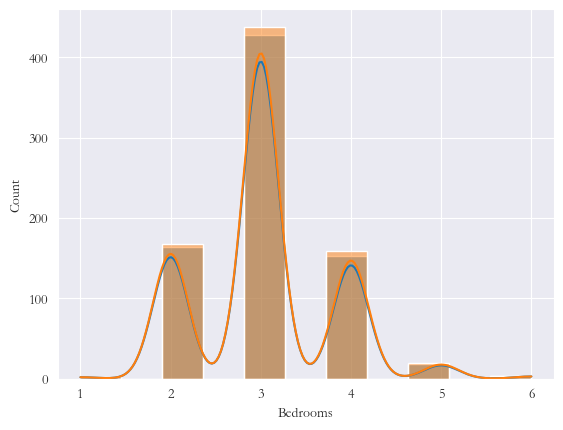

In [31]:
sns.set_palette("tab10")
sns.histplot(df["Bedrooms"], kde= True)
sns.histplot(imputed_df["Bedrooms"], kde= True)
plt.show()

In the next step, as we analyzed the distributions of all our qualitative variables, and as we needed a simple imputation method because there was still some na's in a lot of columns, the decision is done to use the mode for 4 variables.
- Stories and Bathrooms : we know it's not the smartest thing to do here, but it's simple and there are not much missing values. Moreover, we thought about the possibility to use random values following the actual proportions, but there is no evidence of the superiority of this method, it might even be worse. With the mode, the risk of error is more limited.
- Mainroad and Hot_Water_Heating : binary features with a really strong mode (89% and 94%). To use the mode here seems quite good, the chances of doing an error are low.

Here are old and new distributions :

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

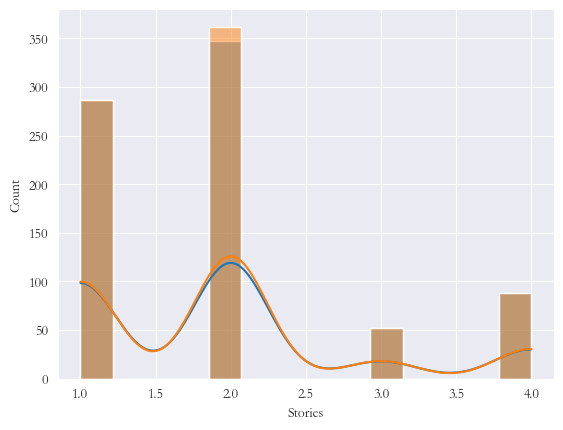

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

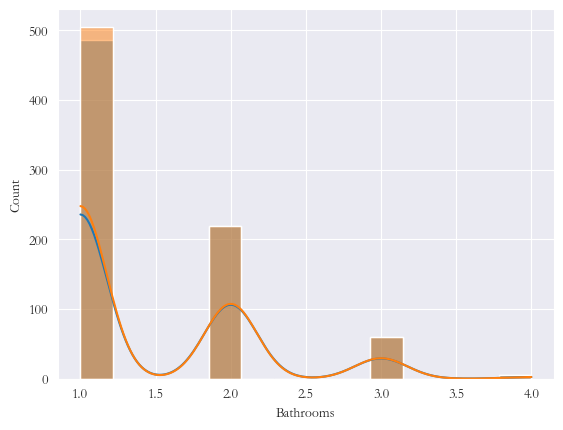

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

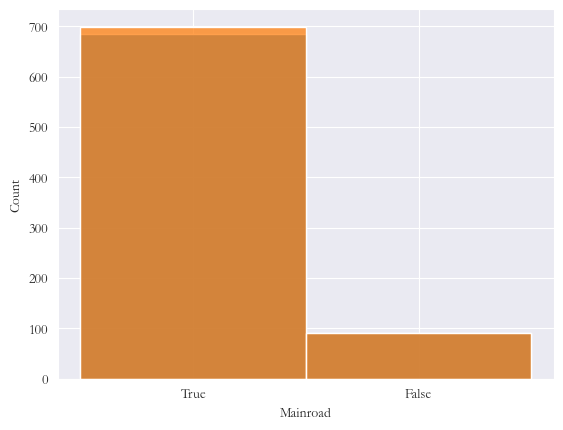

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

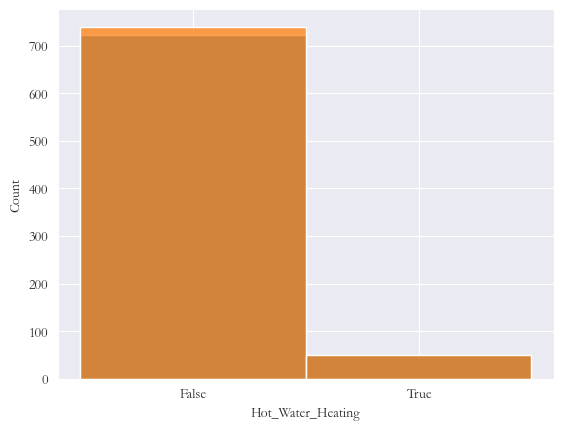

In [32]:
sns.set_palette("tab10")
cols_to_mode_impute = ["Stories", "Bathrooms", "Mainroad", "Hot_Water_Heating"]

for col in cols_to_mode_impute:
    if df[col].dtype == "float64":
        sns.histplot(df[col], kde= True)
        sns.histplot(imputed_df[col], kde= True)
        plt.show()
    else :
        sns.histplot(df[col].astype("string"))
        sns.histplot(imputed_df[col].astype("string"))
        plt.show()    

To impute the numerical missing values of Area, it is a linear model featuring 8 regressors that give a good BIC criteria. The main problem was to deal with missing values into X_miss (matrix of regressors where Area is missing), but there was actually only one value missing. So we just put the mode of the global column at this place, in order to have model.predict(X_miss) working.

c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rashf\anaconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

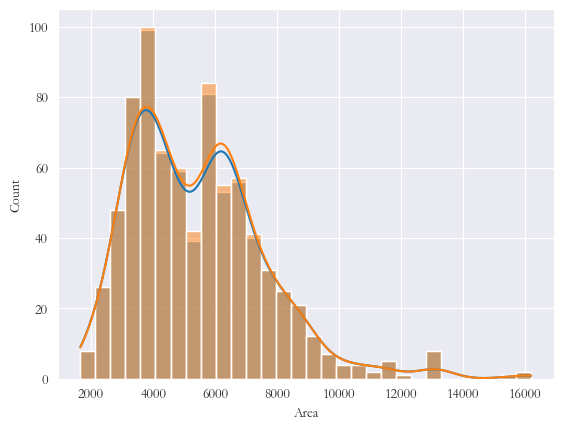

In [33]:
sns.histplot(df["Area"], bins = 30,  kde = True)
sns.histplot(imputed_df["Area"], bins = 30, kde = True)
plt.show()

For the rest of features (all qualitative), a Random Forest Classifier is applied. As this classifier does not handle missing values in training phase, we had to use already imputed regressors. List of regressors welcomes 1 new after each column imputation (see function code).

# Validation croisée

In [43]:
df_encoded = pd.get_dummies(imputed_df, columns=['Furnishing_Status'],prefix='',prefix_sep='')

# Machine Learning

# Conclusion